# Employee Satisfaction Survey Data

Authors: Kubíček Max, Kuzmina Diana, Kuznetsov Andrei, Bajukov Alexej (seminar on Thursday at 16:15)

# Introduction:

Business Value of Addressing the Problem with Machine Learning:
Utilizing machine learning on the Employee Satisfaction Survey dataset can provide numerous benefits to businesses. By leveraging advanced analytics, companies can gain valuable insights into the factors affecting employee satisfaction, leading to improved employee engagement, retention, and overall organizational success. Machine learning models can help identify patterns and correlations within the dataset, allowing companies to make data-driven decisions to enhance workplace conditions, optimize resource allocation, and create targeted interventions to address specific areas of concern. Predictive models may also enable proactive measures to prevent employee turnover, ultimately contributing to a healthier and more productive work environment.

The dataset used for this analysis is sourced from the Kaggle and can be accessed at the following link: https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Employee_Attrition.csv')
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


# Customization: 

*Target Attribute:* 
The selected focal point for this analysis is the “satisfaction_level” (employee's most recent performance evaluation score) attribute within the dataset, signifying the satisfaction level reported by employees. Examining employee satisfaction is crucial, as varying levels of satisfaction may exist across different job roles, departments, or other factors. Analyzing satisfaction within distinct employee groups enables organizations to better cater to the unique needs of each segment, allowing for targeted improvements and a more nuanced understanding of factors influencing job satisfaction.

*Instance of Interest:*
As an "Instance of Interest," we have selected employees who reported experiencing a work-related accident (Work_accident = 1) in our employee satisfaction dataset. Analyzing these instances allows for a targeted investigation into the factors contributing to work accidents, aiding in the identification of patterns and the development of focused safety measures. Instances with Work_accident = 0 provide insights into successful safety practices. Understanding these instances is crucial for improving workplace safety and preventing work-related accidents.

*Attribute of Interest:* 
The attribute of interest is " time_spend_company". This attribute provides valuable insights into the relationship between employee tenure and job satisfaction. Analyzing this information allows to understand how the duration of employment may impact satisfaction levels and contributes to the organization's ability to retain experienced and satisfied employees.

*Subset of Interest:*
The "Subset of Interest" in our analysis is “promotion_last_5years”. Focusing on this subset allows for a targeted examination of how recent promotions correlate with job satisfaction. It provides insights into the impact of career advancement on employees' overall satisfaction levels, helping identify factors contributing to a positive work experience for those who have received promotions. This subset analysis can be instrumental in understanding the effectiveness of the promotion process in fostering employee satisfaction within the organization.


# Cost matrix

In [3]:
import pandas as pd

cost_matrix = {
    'Classification Outcome': ['True Positive (TP)', 'True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)'],
    'Description': [
        "Correctly identifying a satisfied employee",
        "Correctly identifying a dissatisfied employee",
        "Incorrectly classifying a dissatisfied employee as satisfied",
        "Incorrectly classifying a satisfied employee as dissatisfied"
    ],
    'Cost': ['0', '0', 'Moderate', 'High']
}

cost_matrix_df = pd.DataFrame(cost_matrix)
print(cost_matrix_df)


  Classification Outcome                                        Description  \
0     True Positive (TP)         Correctly identifying a satisfied employee   
1     True Negative (TN)      Correctly identifying a dissatisfied employee   
2    False Positive (FP)  Incorrectly classifying a dissatisfied employe...   
3    False Negative (FN)  Incorrectly classifying a satisfied employee a...   

       Cost  
0         0  
1         0  
2  Moderate  
3      High  


"True Positives (TP) and True Negatives (TN) both incur zero cost, reflecting accurate classifications of satisfied and dissatisfied employees. False Positives (FP) carry a moderate cost due to the potential misinterpretation of satisfaction levels without a direct negative impact on the work environment. In contrast, False Negatives (FN) are assigned a high cost. This accounts for the repercussions of misclassifying a satisfied employee as dissatisfied, potentially leading to a significant underestimation of their job-related needs and satisfaction. Such misclassifications could result in more substantial negative implications for employee engagement and organizational performance."

# Data Exploration

## Histograms

..

## Correlation plot

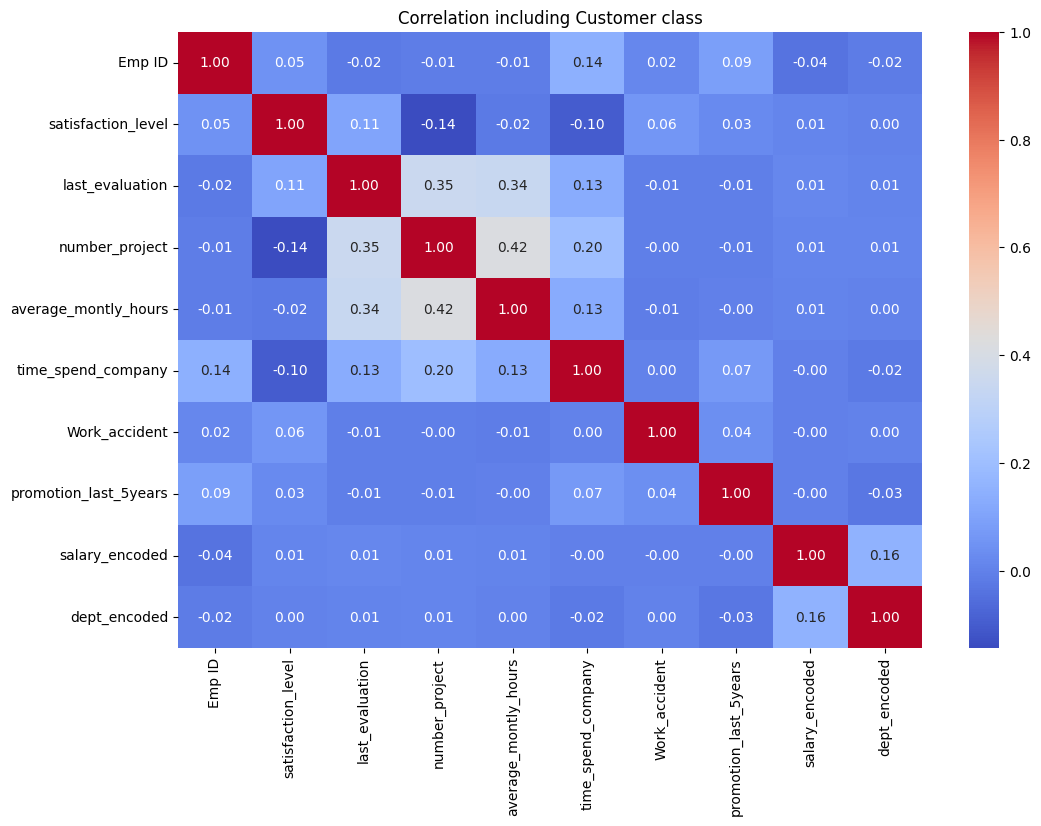

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Employee_Attrition.csv')

dataset_numerical = df.copy()
label_encoder = LabelEncoder()

#conversion to numerical values
dataset_numerical['salary_encoded'] = label_encoder.fit_transform(df['salary'])
dataset_numerical['dept_encoded'] = label_encoder.fit_transform(df['dept'])

numerical_columns = dataset_numerical.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dataset_numerical[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation including Customer class')
plt.show()

The plot includes all numerical variables from dataset, plus the salary and dept which has been encoded into numerical format.

Each cell in the heatmap displays a correlation coefficient within the -1 to 1 range, signifying the intensity and direction of the connection between two variables. We usually distinguish between three main coeficient values:
- A positive correlation (near +1) signifies that as one variable rises, the other typically follows suit.
- Conversely, a negative correlation (near -1) suggests that as one variable increases, the other tends to decrease.
- A correlation around 0 indicates no clear linear relationship between the variables.

## Interpretation of the results


## Histograms


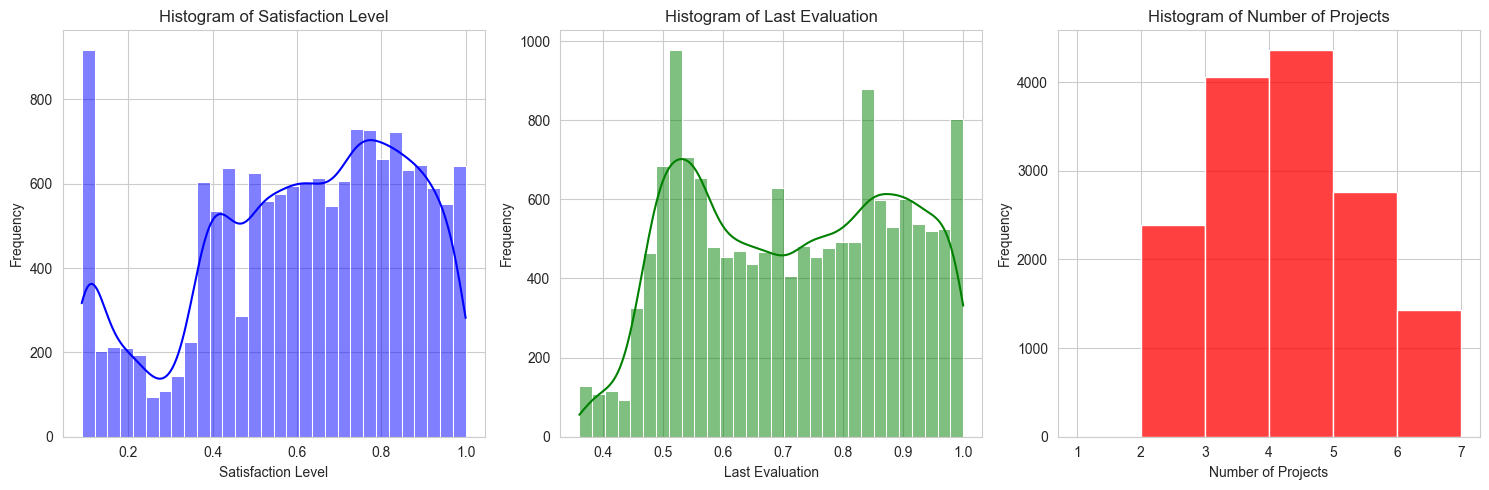


Summary of the Dataset:
--- Emp ID ---
Count: 14999.0
Mean: 7500.00
Standard Deviation: 4329.98
Minimum Value: 1.0
25th Percentile: 3750.5
Median (50th Percentile): 7500.0
75th Percentile: 11249.5
Maximum Value: 14999.0


--- satisfaction_level ---
Count: 14999.0
Mean: 0.61
Standard Deviation: 0.25
Minimum Value: 0.09
25th Percentile: 0.44
Median (50th Percentile): 0.64
75th Percentile: 0.82
Maximum Value: 1.0
Represents the satisfaction level of employees, ranging from 0 (very low) to 1 (very high).


--- last_evaluation ---
Count: 14999.0
Mean: 0.72
Standard Deviation: 0.17
Minimum Value: 0.36
25th Percentile: 0.56
Median (50th Percentile): 0.72
75th Percentile: 0.87
Maximum Value: 1.0
Reflects the score from the last evaluation for each employee, with a range from 0 to 1.


--- number_project ---
Count: 14999.0
Mean: 3.80
Standard Deviation: 1.23
Minimum Value: 2.0
25th Percentile: 3.0
Median (50th Percentile): 4.0
75th Percentile: 5.0
Maximum Value: 7.0
Indicates the number of pro

In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure to hold multiple subplots
plt.figure(figsize=(15, 5))

# Histogram for Satisfaction Level
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(df['satisfaction_level'], kde=True, bins=30, color='blue')
plt.title('Histogram of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Histogram for Last Evaluation
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(df['last_evaluation'], kde=True, bins=30, color='green')
plt.title('Histogram of Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')

# Histogram for Number of Projects
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(df['number_project'], kde=False, bins=range(1, int(df['number_project'].max()) + 1), color='red')
plt.title('Histogram of Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')


# Show the plots
plt.tight_layout()
plt.show()

# Summary
print("\nSummary of the Dataset:")
def describe_dataset(summary):
    for column in summary.columns:
        print(f"--- {column} ---")
        col_data = summary[column]

        # General Stats
        print(f"Count: {col_data['count']}")
        print(f"Mean: {col_data['mean']:.2f}")
        print(f"Standard Deviation: {col_data['std']:.2f}")
        print(f"Minimum Value: {col_data['min']}")
        print(f"25th Percentile: {col_data['25%']}")
        print(f"Median (50th Percentile): {col_data['50%']}")
        print(f"75th Percentile: {col_data['75%']}")
        print(f"Maximum Value: {col_data['max']}")

        # Specific Interpretations
        if column == 'satisfaction_level':
            print("Represents the satisfaction level of employees, ranging from 0 (very low) to 1 (very high).")
        elif column == 'last_evaluation':
            print("Reflects the score from the last evaluation for each employee, with a range from 0 to 1.")
        elif column == 'number_project':
            print("Indicates the number of projects assigned to each employee.")
        elif column == 'average_montly_hours':
            print("Shows the average number of hours worked per month by each employee.")
        elif column == 'time_spend_company':
            print("Represents the number of years an employee has spent at the company.")
        elif column == 'Work_accident':
            print("Indicates whether the employee had a work accident (1) or not (0).")
        elif column == 'promotion_last_5years':
            print("Shows whether the employee received a promotion in the last five years (1) or not (0).")
        print("\n")

# Usage
describe_dataset(df.describe())



### Correlation Plot

1. number_of_projects and monthly_hours: The correlation between these two features is high and the reason is obvious. The more number of projects an individual has the more hours he works. 

2. last_evaluation and number_of_projects: The correlation between them is relatively high and this indicates that people with more assigned projects have higher perfomance score.

3. last_evaluation and average_monthly_hours: The correlation also is relatively high, because montly_hours can be transitivly derived from last_evaluation and this metric is almost indentical to average_monthly_hours.

4. number_of_projects and satisfaction_level: The metrics have low correlation and this indicates the fact that people with litle number of projects may have same level of satisfaction as people with a lot of projects.  